In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

In [8]:
df=pd.read_csv("Dataset.csv")

In [13]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
df.shape

(6362620, 11)

In [15]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [20]:
len(df.columns)

11

In [22]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [25]:
df["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [26]:
df["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [33]:
percentage_fraud=round(df["isFraud"].value_counts()[1]/df.shape[0] * 100,2)
percentage_fraud

0.13

In [35]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [36]:
df.isnull().sum().sum()

0

In [38]:
df["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

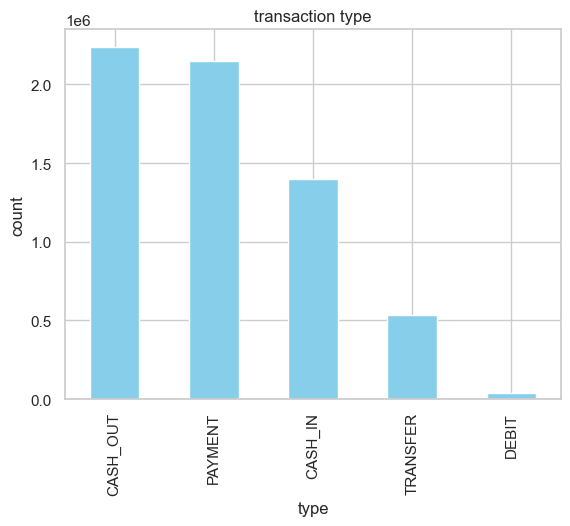

In [57]:
df["type"].value_counts().plot(kind="bar", title="transaction type", color="skyblue")
plt.ylabel("count")
plt.show()

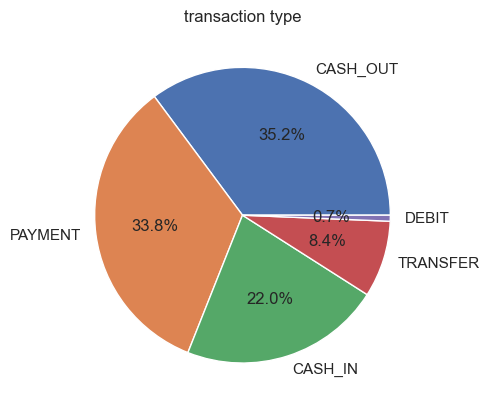

In [47]:
df["type"].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("transaction type")
plt.ylabel("")  
plt.show()


In [56]:
counts_type = df['type'].value_counts()
percentages_type = round(counts_type / counts_type.sum() * 100,1)
print(percentages_type)

type
CASH_OUT    35.2
PAYMENT     33.8
CASH_IN     22.0
TRANSFER     8.4
DEBIT        0.7
Name: count, dtype: float64


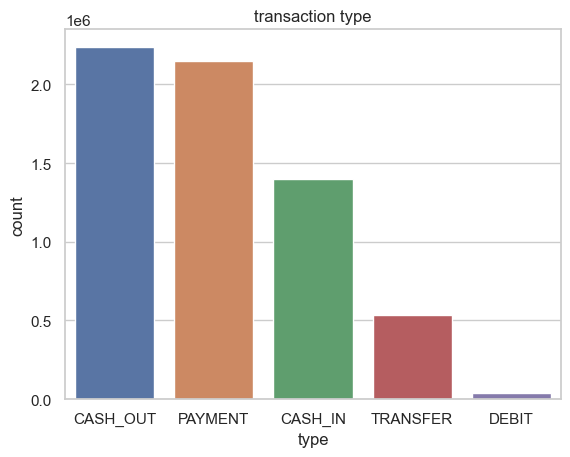

In [42]:
order = df['type'].value_counts().index
sns.countplot(x='type', data=df, order=order)
plt.title("transaction type")
plt.show()

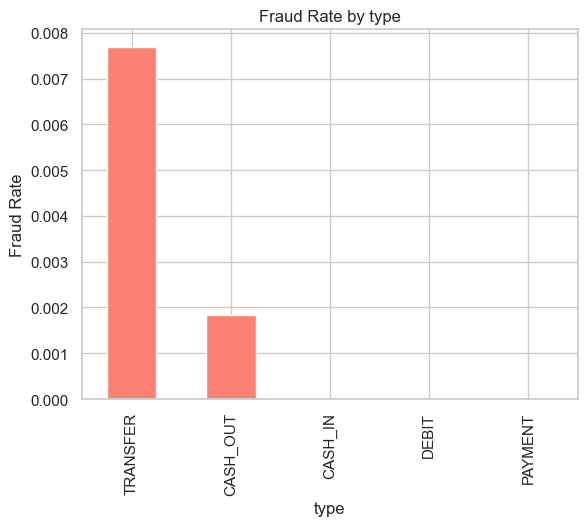

In [60]:
fraud_by_type=df.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_by_type.plot(kind="bar", title="Fraud Rate by type", color="salmon")
plt.ylabel("Fraud Rate")
plt.show()

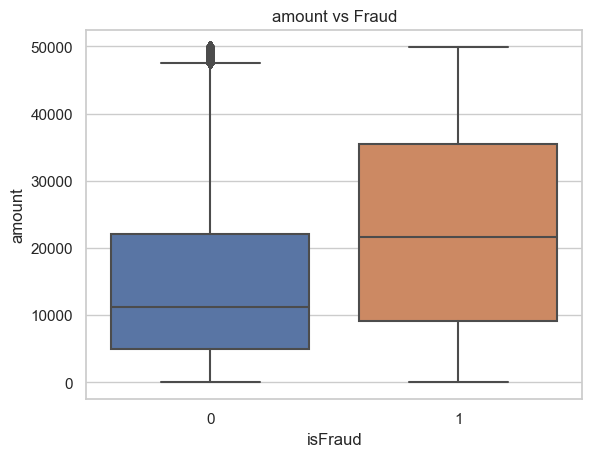

In [86]:
sns.boxplot(data=df[df["amount"]<50000], x="isFraud", y="amount")
plt.title("amount vs Fraud")
plt.show()

In [87]:
df["balanceDiffOrig"]=df["oldbalanceOrg"]-df["newbalanceOrig"]
df["balanceDiffDest"]=df["newbalanceDest"]-df["oldbalanceDest"]

In [88]:
(df["balanceDiffDest"]<0).sum()

1238864

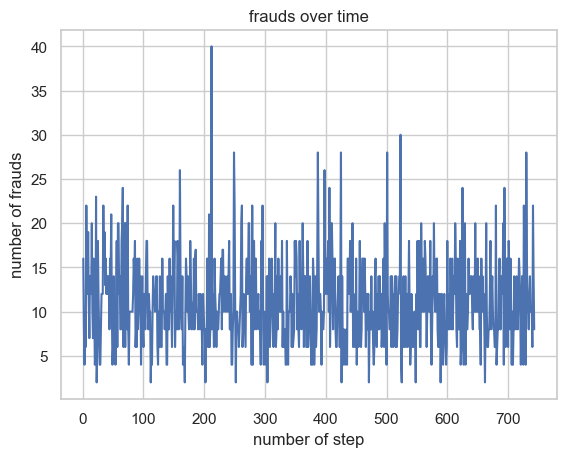

In [89]:
fraud_per_step=df[df["isFraud"]==1]["step"].value_counts().sort_index()
plt.plot(fraud_per_step.index, fraud_per_step.values, label="Frauds per step")
plt.xlabel("number of step")
plt.ylabel("number of frauds")
plt.title("frauds over time")
plt.show()

In [92]:
df=df.drop(columns="step")

In [93]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [96]:
top_senders=df["nameOrig"].value_counts().head(10)

In [97]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [98]:
top_receiver=df["nameDest"].value_counts().head(10)

In [99]:
top_receiver

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [102]:
fraud_users=df[df["isFraud"]==1]["nameOrig"].value_counts().head(10)

In [103]:
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [104]:
fraud_type=df[df["type"].isin(["PAYMENT","CASH_OUT"])]

In [107]:
fraud_type["type"].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
Name: count, dtype: int64

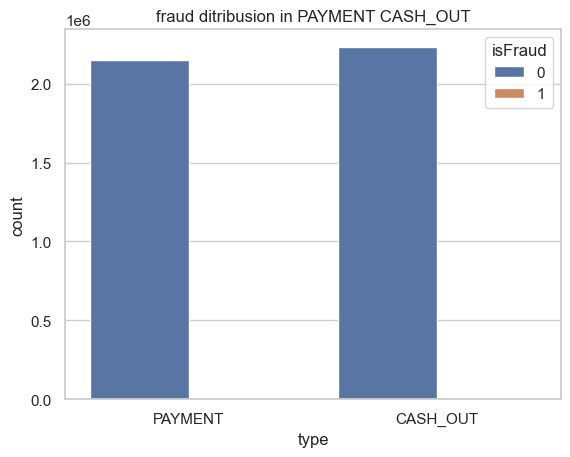

In [109]:
sns.countplot(data=fraud_type, x="type", hue="isFraud")
plt.title("fraud ditribusion in PAYMENT CASH_OUT")
plt.show()

In [116]:
fraud_type["isFraud"].value_counts()

isFraud
0    4384879
1       4116
Name: count, dtype: int64

In [121]:
corr=df[["amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest", "newbalanceDest", "isFraud"]].corr()

In [122]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


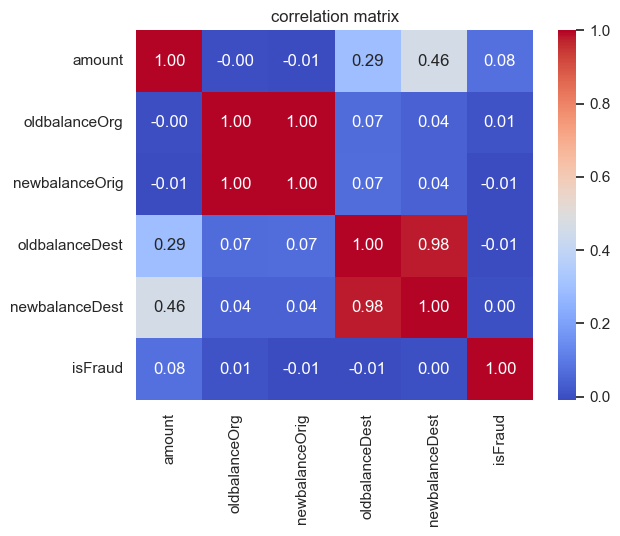

In [124]:
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("correlation matrix")
plt.show()

In [128]:
zero_after_transfer=df[
    (df["oldbalanceOrg"]>0) &
    (df["newbalanceOrig"]==0) &
    (df["type"].isin(["PAYMENT","CASH_OUT"]))
]

In [129]:
len(zero_after_transfer)

1286291

In [130]:
zero_after_transfer.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,181.0,-21182.00
8,PAYMENT,4024.36,C1265012928,2671.0,0.0,M1176932104,0.0,0.00,0,0,2671.0,0.00
13,PAYMENT,11633.76,C1716932897,10127.0,0.0,M801569151,0.0,0.00,0,0,10127.0,0.00
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,15325.0,46430.44
16,PAYMENT,1563.82,C761750706,450.0,0.0,M1731217984,0.0,0.00,0,0,450.0,0.00


In [133]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [134]:
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,-21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [137]:
df_model=df.drop(["nameOrig","nameDest","isFlaggedFraud"], axis=1)

In [138]:
df_model.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,9839.64,0.0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,1864.28,0.0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,1,181.00,0.0
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1,181.00,-21182.0
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,11668.14,0.0


In [139]:
categorical=["type"]
numeric=["amount", "oldbalanceOrg", "newbalanceOrig","oldbalanceDest", "newbalanceDest"]

In [140]:
y=df_model["isFraud"]
X=df_model.drop("isFraud",axis=1)

In [142]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, stratify=y)

In [154]:
print("y_train distribution:", np.bincount(y_train))
print("y_test distribution:", np.bincount(y_test))

y_train distribution: [4448085    5749]
y_test distribution: [1906322    2464]


In [157]:
preprocessor=ColumnTransformer(
transformers=[
    ("num",StandardScaler(),numeric),
    ("cat",OneHotEncoder(drop="first"), categorical)
],
    remainder="drop"
)

In [162]:
pipeline=Pipeline([
    ("prep",preprocessor),
    ("clf",LogisticRegression(class_weight="balanced",max_iter=200))
])

In [ ]:
pipeline.fit(X_train,y_train)

In [164]:
y_pred=pipeline.predict(X_test)

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97   1906322
           1       0.02      0.94      0.04      2464

    accuracy                           0.95   1908786
   macro avg       0.51      0.95      0.51   1908786
weighted avg       1.00      0.95      0.97   1908786



In [166]:
confusion_matrix(y_test,y_pred)

array([[1805037,  101285],
       [    138,    2326]], dtype=int64)

In [169]:
pipeline.score(X_test,y_test)

0.946865180276888

In [168]:
round(pipeline.score(X_test,y_test),2)

0.95

In [181]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

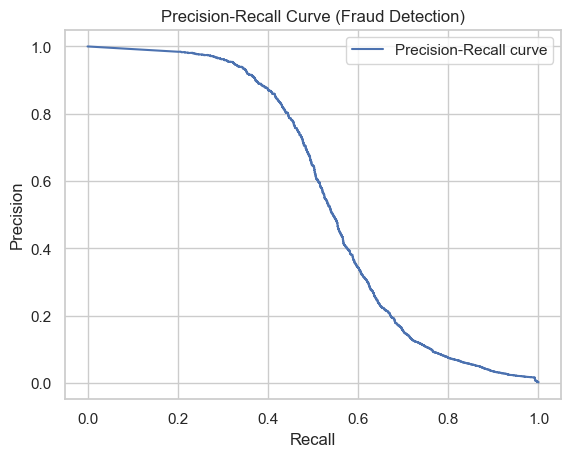

In [182]:
y_scores = pipeline.predict_proba(X_test)[:, 1]


precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


plt.plot(recall, precision, label="Precision-Recall curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Fraud Detection)")
plt.legend()
plt.show()

In [183]:
ap = average_precision_score(y_test, y_scores)
print("Average Precision Score:", ap)


best_threshold = thresholds[np.argmax(precision * recall)]
print("Best threshold:", best_threshold)

Average Precision Score: 0.5554897497910111
Best threshold: 0.9999816473306647


In [184]:
y_pred_best = (y_scores >= best_threshold).astype(int)
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.83      0.43      0.56      2464

    accuracy                           1.00   1908786
   macro avg       0.92      0.71      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [185]:
for t in [0.5, 0.9, 0.99, 0.999, 0.9999]:
    y_pred_t = (y_scores >= t).astype(int)
    print(f"\nThreshold = {t}")
    print(classification_report(y_test, y_pred_t, digits=3))



Threshold = 0.5
              precision    recall  f1-score   support

           0      1.000     0.947     0.973   1906322
           1      0.022     0.944     0.044      2464

    accuracy                          0.947   1908786
   macro avg      0.511     0.945     0.508   1908786
weighted avg      0.999     0.947     0.971   1908786


Threshold = 0.9
              precision    recall  f1-score   support

           0      1.000     0.991     0.995   1906322
           1      0.097     0.765     0.172      2464

    accuracy                          0.991   1908786
   macro avg      0.548     0.878     0.584   1908786
weighted avg      0.999     0.991     0.994   1908786


Threshold = 0.99
              precision    recall  f1-score   support

           0      1.000     0.998     0.999   1906322
           1      0.300     0.621     0.405      2464

    accuracy                          0.998   1908786
   macro avg      0.650     0.809     0.702   1908786
weighted avg      0.99

In [194]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_recall_curve, average_precision_score

In [195]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", "passthrough", numeric),  
        ("cat", OneHotEncoder(drop="first"), categorical)
    ],
    remainder="drop"
)

In [196]:
rf_pipeline = Pipeline([
    ("prep", preprocessor),
    ("clf", RandomForestClassifier(
        n_estimators=500,
        max_depth=None,
        class_weight="balanced",
        n_jobs=-1,
        random_state=42
    ))
])

In [ ]:
rf_pipeline.fit(X_train, y_train)

In [204]:
y_pred=rf_pipeline.predict(X_test)

In [205]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.97      0.78      0.86      2464

    accuracy                           1.00   1908786
   macro avg       0.98      0.89      0.93   1908786
weighted avg       1.00      1.00      1.00   1908786



In [245]:
import pickle

In [206]:
with open("rf_fraud_detection.pkl", "wb") as f:
    pickle.dump(rf_pipeline, f)